In [1]:
%load_ext autoreload
%autoreload 2
# from exon_evolution import *
from exon_analysis import *
from global_var import *

In [2]:
dirct = FASTA_files_direct + 'pieris_napi/data/Pieris_napi_brakerProt_rename_agat.gff'
genome_dirct = FASTA_files_direct + 'pieris_napi/Pieris_napi-GCA_905231885.1-softmasked.fa'
db_direct = DB_dirct + 'pieris_napi.db'
gene_hierarchy_path = PKL_files_direct + 'Pieris_napi_gene_hierarchy_dict.pkl'

In [3]:
Pn_genome_analysis = exon_analysis(db_direct,
                                   gene_hierarchy_path,
                                   gene_hierarchy=False)
Pn_genome_analysis.get_annotations_dict()

In [4]:
Pn_genome_analysis.generate_basic_statistics()

,Number,Size total (kb),Size mean (bp)
CDS,123638,26884.55,217.45
exon,123638,26966.50,218.11
five_prime_UTR,22,62.28,2831.09
gene,32898,220931.03,6715.64
intron,105783,102665.38,970.53
mRNA,17894,129761.45,7251.67
start_codon,17841,35.68,2.00
stop_codon,17844,35.69,2.00
three_prime_UTR,17,19.63,1154.82
transcript,16964,114183.29,6730.92


In [5]:
Pn_genome_analysis.check_overlaps()

In [6]:
# search for genes with overlaping intron/exon annotations
# we neglect these genes from the analysis
for i in set(Pn_genome_analysis.genes_with_incorrect_intron_exon_overlaps):
    print(i)

P_napi_26776
P_napi_27377
P_napi_23679
P_napi_30757
P_napi_19272
P_napi_10769
P_napi_15353
P_napi_32605
P_napi_18727
P_napi_12375
P_napi_25265
P_napi_24090
P_napi_12240
P_napi_32430
P_napi_32342


In [7]:
# annotations overlaps: 
# eg. 33 exon annotations overlap with a CDs annotation
# This is after removing the overlaps
for key, value in Pn_genome_analysis.intersections_counter.items():
    print(key)
    print(value)
    print('   ')

CDS
{'CDS': 0, 'exon': 6, 'intron': 0, 'five_prime_UTR': 0, 'three_prime_UTR': 0}
   
exon
{'CDS': 33, 'exon': 0, 'intron': 0, 'five_prime_UTR': 3, 'three_prime_UTR': 0}
   
intron
{'CDS': 0, 'exon': 0, 'intron': 0, 'five_prime_UTR': 0, 'three_prime_UTR': 0}
   
five_prime_UTR
{'CDS': 0, 'exon': 19, 'intron': 0, 'five_prime_UTR': 0, 'three_prime_UTR': 0}
   
three_prime_UTR
{'CDS': 0, 'exon': 0, 'intron': 0, 'five_prime_UTR': 0, 'three_prime_UTR': 0}
   


In [8]:
Pn_genome_analysis.dump_pkl_file(gene_hierarchy_path,
                                 Pn_genome_analysis.gene_hierarchy_dict)
Pn_genome_analysis.gene_hierarchy_dict = Pn_genome_analysis.read_pkl_file(gene_hierarchy_path)

In [9]:
Pn_genome_analysis.get_gene_hierarchy_dict_with_coding_exons()
Pn_genome_analysis.read_genome(genome_dirct)

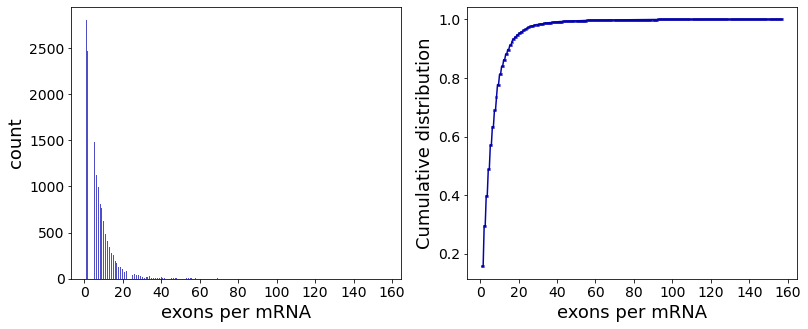

In [10]:
Pn_genome_analysis.plot_exons_hist_cdf()

In [11]:
Pn_genome_analysis.get_within_gene_real_exon_dupl(exons_min_len=50,
                                                  filename=PKL_files_direct+'Pieris_napi_real_exon_dup.apkl')

100%|██████████████████████████████████████████████████████████████████| 32883/32883 [05:53<00:00, 92.97it/s]


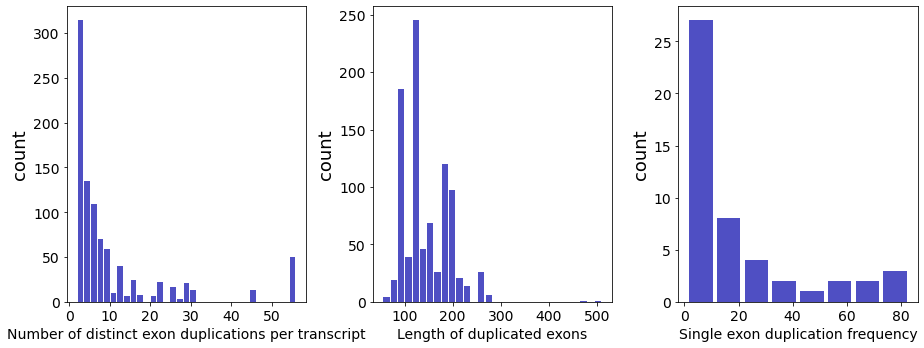

In [12]:
Pn_genome_analysis.plot_histograms_on_real_exon_dup()

In [13]:
len_of_dup_exon = []
for gene, gene_trascpt_dict in Pn_genome_analysis.genes_coding_exons.items():
    for transcpt, trascpt_dict in gene_trascpt_dict.items():
        for exon_id, exons_list in trascpt_dict.items():
            len_of_dup_exon.append(
                (gene, gene_trascpt_dict, exon_id, exons_list[0][1] - exons_list[0][0])
            )